In [1]:
%pwd

'C:\\Users\\hp'

In [2]:
%cd C:\Users\hp\darkflow-master

C:\Users\hp\darkflow-master


In [3]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "svg"

C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [4]:
options = {
    "model":"cfg/yolov2-tiny-Copy.cfg ",
    "load":1000,
    "threshold":0.23,
    "gpu":1.0
}

tfnet = TFNet(options)

Parsing cfg/yolov2-tiny-Copy.cfg 
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load

In [5]:
img = cv2.imread("F:/ml/data/face mask lew/without mask/face_without_mask_29.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)

print(len(result))


tl = []
br = []
label = []
confidence = []
for i in range(len(result)):
    tl.append((result[i]["topleft"]["x"],result[i]["topleft"]["y"]))
    br.append((result[i]["bottomright"]["x"],result[i]["bottomright"]["y"]))
    confidence.append((result[i]["confidence"]))
    label.append((result[i]["label"]))

4


In [6]:
label

['no_mask', 'no_mask', 'no_mask', 'no_mask']

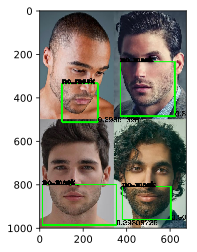

In [7]:
for i in range(len(result)):
    img = cv2.rectangle(img,tl[i],br[i],(0,255,0),5)
    img = cv2.putText(img, label[i], tl[i], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 5)
    img = cv2.putText(img, str(confidence[i]), br[i], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)

In [8]:
img = cv2.imread("F:/ml/data/face mask lew/face_mask_data/face_with_mask_46.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)

print(len(result))


tl = []
br = []
label = []
confidence = []
for i in range(len(result)):
    tl.append((result[i]["topleft"]["x"],result[i]["topleft"]["y"]))
    br.append((result[i]["bottomright"]["x"],result[i]["bottomright"]["y"]))
    confidence.append((result[i]["confidence"]))
    label.append((result[i]["label"]))

6


In [9]:
label

['mask', 'mask', 'mask', 'mask', 'mask', 'mask']

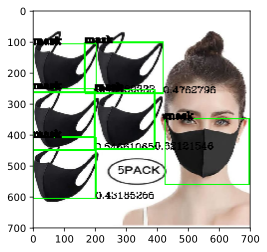

In [10]:
for i in range(len(result)):
    img = cv2.rectangle(img,tl[i],br[i],(0,255,0),3)
    img = cv2.putText(img, label[i], tl[i], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 5)
    img = cv2.putText(img, str(confidence[i]), br[i], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)